# Azure Document Intelligence

In [1]:
pip install azure-ai-formrecognizer


Note: you may need to restart the kernel to use updated packages.


In [2]:
key="BjuDQYDvFxFAi2Awb8auJbU3JkLrgGXQSfCdClGlaXHlpTjQd6lsJQQJ99ALACYeBjFXJ3w3AAALACOGbgTn"
end_point="https://billinvoice.cognitiveservices.azure.com/"

In [3]:
from azure.core.credentials import AzureKeyCredential
from azure.ai.formrecognizer import DocumentAnalysisClient
credential=AzureKeyCredential(key)
document_analysis_client=DocumentAnalysisClient(end_point,credential)

In [4]:
from azure.storage.blob import BlobServiceClient
blob_account_url="https://azureaimll.blob.core.windows.net"
storage_credential='pmdXYtFb4hpgJ/Xie/ITYHug3EsNtHBTbMnaFcF8C8gk+oAY5UzTOsylkFpnNcAKC8VMk2ZKGSuL+AStT89pSA=='

blob_service_client=BlobServiceClient(account_url=blob_account_url,
                                      credential=storage_credential)

blob_service_client


In [5]:
all_container=blob_service_client.list_containers()
list(all_container)


[{'name': 'cloudcontainer', 'last_modified': datetime.datetime(2024, 11, 28, 3, 30, 6, tzinfo=datetime.timezone.utc), 'etag': '"0x8DD0F5CF4287DC3"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x000001BE95493F80>, 'immutable_storage_with_versioning_enabled': False},
 {'name': 'createcontainer', 'last_modified': datetime.datetime(2024, 11, 28, 17, 35, 18, tzinfo=datetime.timezone.utc), 'etag': '"0x8DD0FD306EC9506"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x000001BE956DEFC0>, 'immutable

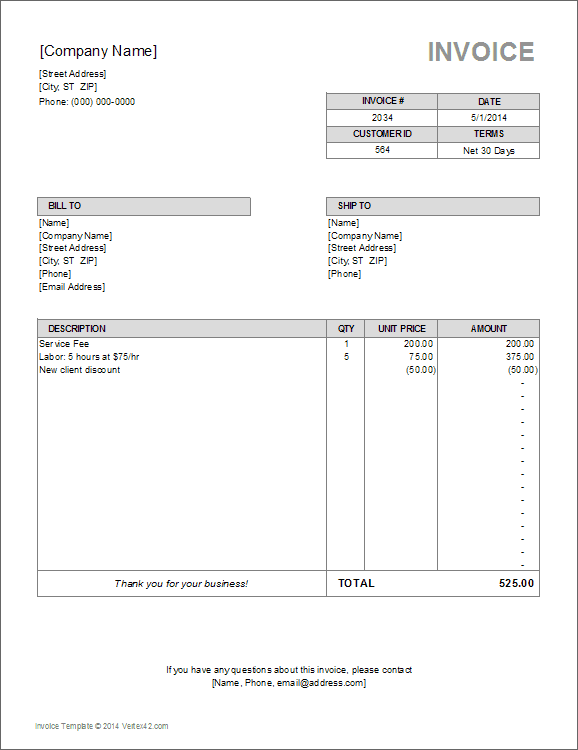

In [6]:
blob_client = blob_service_client.get_blob_client('cloudcontainer', 'billing-invoice-template.JPEG')
data = blob_client.download_blob()
from PIL import Image
Image.open(data)

In [13]:
#Initialize Blob client
from azure.storage.blob import BlobClient
blob_account_url="https://azureaimll.blob.core.windows.net"
storage_credential='pmdXYtFb4hpgJ/Xie/ITYHug3EsNtHBTbMnaFcF8C8gk+oAY5UzTOsylkFpnNcAKC8VMk2ZKGSuL+AStT89pSA=='
blob_url = "https://azureaimll.blob.core.windows.net/cloudcontainer/billing-invoice-template.JPEG"

blob_client = BlobClient.from_blob_url(blob_url=blob_url,credential=storage_credential)

# Download the image invoice from Azure Storage
with open("billing-invoice-template.JPEG","wb") as download_file:
    download_file.write(blob_client.download_blob().readall())

# Analyze the image using Document Intelligence
with open("billing-invoice-template.JPEG", "rb") as invoice_image:
    poller = document_analysis_client.begin_analyze_document("prebuilt-invoice", document=invoice_image)
    result = poller.result()
    
# Print out the extracted data
for idx, invoice in enumerate(result.documents):
    print(f"============Recognise Invoice: {idx +1}===================")

    #for name, field in invoice.fields.items():
            #print(f"{name}: {field.value}")
for i in invoice.fields:
    print(i)
    print(f"{i}:{invoice.fields[i].value}")



============Recognise Invoice: 1===================
CustomerId
CustomerId:584
InvoiceDate
InvoiceDate:2014-05-01
InvoiceId
InvoiceId:2034
InvoiceTotal
InvoiceTotal:525.0
Items
Items:[DocumentField(value_type=dictionary, value={'Amount': DocumentField(value_type=currency, value=CurrencyValue(amount=200.0, symbol=None, code=USD), content=200.00, bounding_regions=[BoundingRegion(page_number=1, polygon=[Point(x=506.0, y=338.0), Point(x=534.0, y=338.0), Point(x=534.0, y=348.0), Point(x=506.0, y=348.0)])], spans=[DocumentSpan(offset=349, length=6)], confidence=0.852), 'Description': DocumentField(value_type=string, value='Service Fee', content=Service Fee, bounding_regions=[BoundingRegion(page_number=1, polygon=[Point(x=39.0, y=338.0), Point(x=89.0, y=338.0), Point(x=89.0, y=349.0), Point(x=39.0, y=349.0)])], spans=[DocumentSpan(offset=328, length=11)], confidence=0.852), 'Quantity': DocumentField(value_type=float, value=1.0, content=1, bounding_regions=[BoundingRegion(page_number=1, polygon

In [17]:
for idx, invoice in enumerate(result.documents):
    print(f"============Recognise Invoice: {idx + 1}===================")
    for i in invoice.fields:
        if i=='Items':
            value=invoice.fields[i].value[0].value['Amount'].value
            item=invoice.fields[i].value[0].value['Description'].value
            print(f"{item} has {value}")

============Recognise Invoice: 1===================
Service Fee has 200.0


In [19]:
for idx, invoice in enumerate(result.documents):
    print(f"============Recognise Invoice: {idx + 1}===================")
    for i in invoice.fields:
        if i=='Items':
           print(len(invoice.fields[i].value))

============Recognise Invoice: 1===================
3


In [21]:
for idx, invoice in enumerate(result.documents):
    print(f"============Recognise Invoice: {idx + 1}===================")
    for i in invoice.fields:
        if i=='Items':
            for element in range(len(invoice.fields[i].value)):
                value=invoice.fields[i].value[0].value['Amount'].value
                item=invoice.fields[i].value[0].value['Description'].value
                print(f"{item} has {value}")

        if i!='Items':
            print(f"{i}:{invoice.fields[i].value}")

============Recognise Invoice: 1===================
CustomerId:584
InvoiceDate:2014-05-01
InvoiceId:2034
InvoiceTotal:525.0
Service Fee has 200.0
Service Fee has 200.0
Service Fee has 200.0
PaymentTerm:Net 30 Days
